# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [2]:
from utils import get_dataset
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import glob
import json
import numpy as np

In [2]:
dataset = get_dataset("data/waymo/training_and_validation/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(element):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # Color map for class: color
    colormap = {1: [1, 0, 0], 2: [0, 0, 1], 4: [0, 1, 0]}
    image = element["image"].numpy()
    img_shape = image.shape
    filename = element['filename']
    bboxes = element['groundtruth_boxes'].numpy()
    bbox_classes = element['groundtruth_classes'].numpy()
    # Print information
    print('Name of TFrecord: {}'.format(filename))
    print('Imageshape: {}'.format(img_shape))
    print('Number of BBoxes: {}'.format(len(bboxes)))
    print('Number of Objects: {}'.format(len(bbox_classes)))
    print("Classes: ", bbox_classes)
    
    # Draw rectangles
    fig, ax = plt.subplots(figsize=(10,10))

    for cl, bb in zip(bbox_classes, bboxes):
        # Box coordinates are normalized [0,1]
        y1, x1, y2, x2 = bb*[img_shape[1], img_shape[0], img_shape[1], img_shape[0]]
        rec = Rectangle((x1,y1), x2-x1, y2-y1, facecolor='none', 
                       linewidth=1,edgecolor=colormap[cl])
        ax.add_patch(rec)
    plt.axis('off')
    
    # Plot the image with its corresponding bboxes
    imgplot = ax.imshow(image)
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

Name of TFrecord: b'segment-1051897962568538022_238_170_258_170_with_camera_labels_0.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 21
Number of Objects: 21
Classes:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]


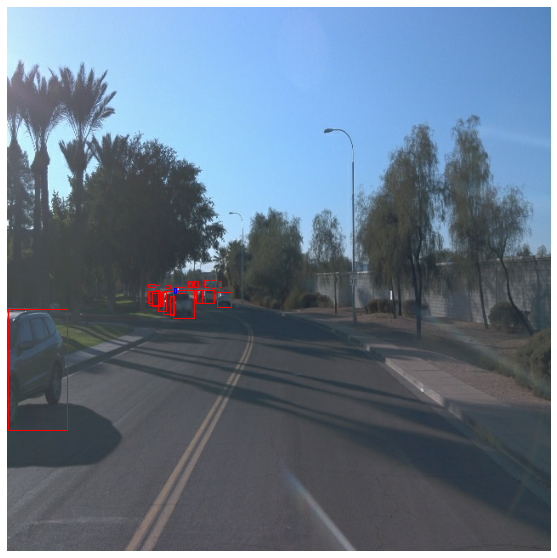

Name of TFrecord: b'segment-11940460932056521663_1760_000_1780_000_with_camera_labels_110.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 65
Number of Objects: 65
Classes:  [1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 2 1 1 2 2]


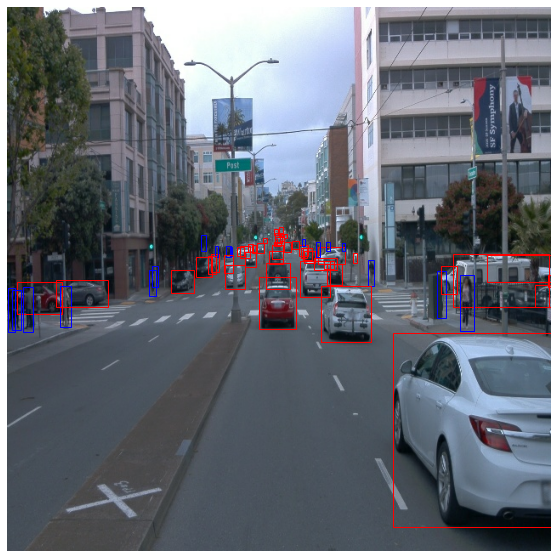

Name of TFrecord: b'segment-10500357041547037089_1474_800_1494_800_with_camera_labels_170.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 25
Number of Objects: 25
Classes:  [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


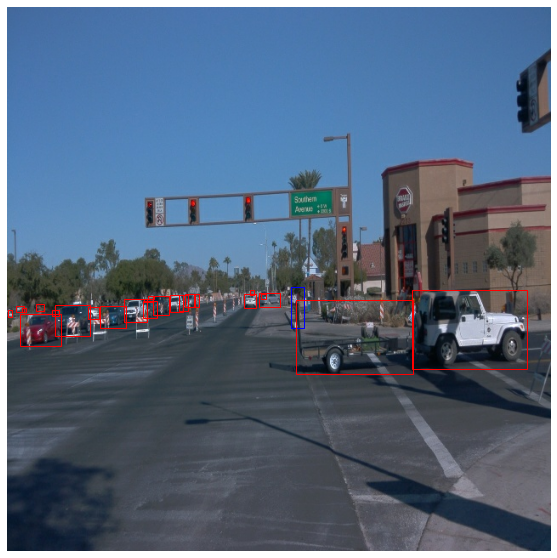

Name of TFrecord: b'segment-10082223140073588526_6140_000_6160_000_with_camera_labels_50.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 17
Number of Objects: 17
Classes:  [1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1]


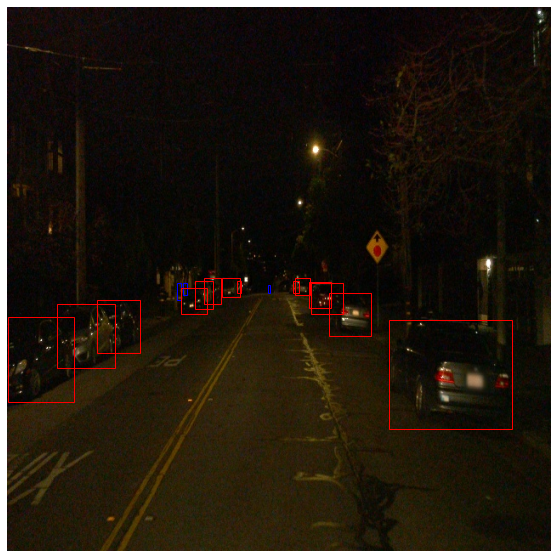

Name of TFrecord: b'segment-1172406780360799916_1660_000_1680_000_with_camera_labels_120.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 15
Number of Objects: 15
Classes:  [1 2 1 1 1 1 1 1 1 1 2 1 1 1 1]


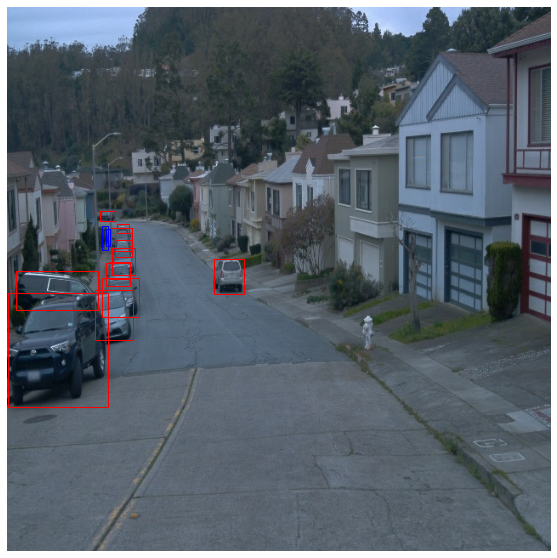

Name of TFrecord: b'segment-10212406498497081993_5300_000_5320_000_with_camera_labels_10.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 51
Number of Objects: 51
Classes:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 1 1 1 1 1 1 2]


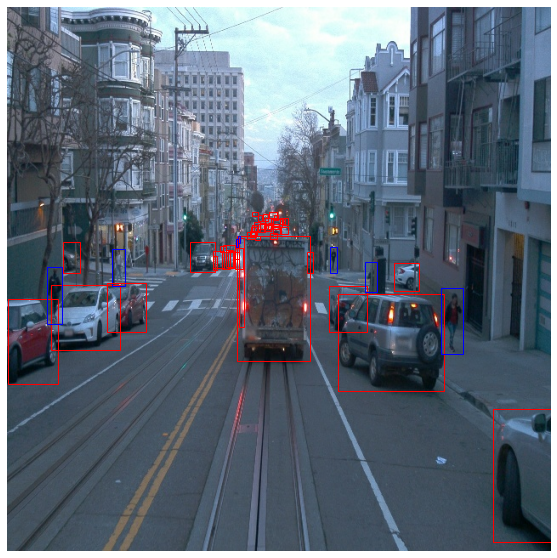

Name of TFrecord: b'segment-10327752107000040525_1120_000_1140_000_with_camera_labels_10.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 2
Number of Objects: 2
Classes:  [1 1]


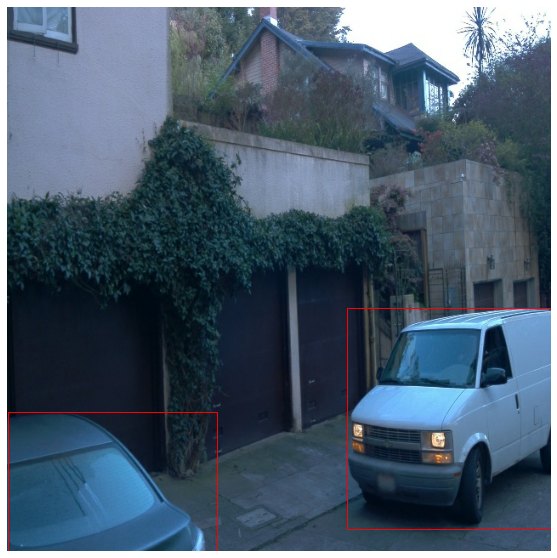

Name of TFrecord: b'segment-10625026498155904401_200_000_220_000_with_camera_labels_80.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 38
Number of Objects: 38
Classes:  [1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1]


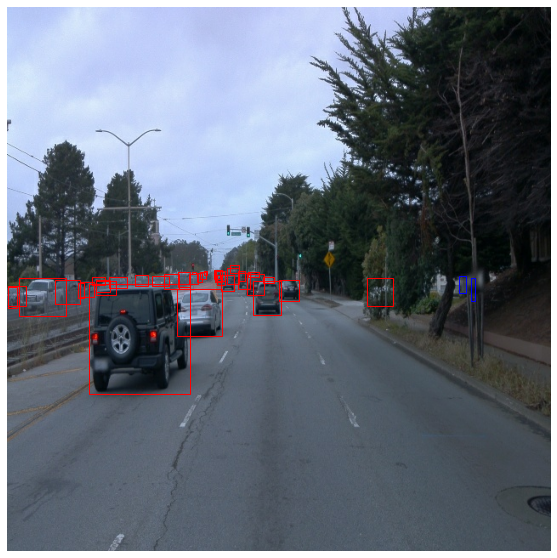

Name of TFrecord: b'segment-12179768245749640056_5561_070_5581_070_with_camera_labels_110.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 7
Number of Objects: 7
Classes:  [1 1 1 1 1 1 1]


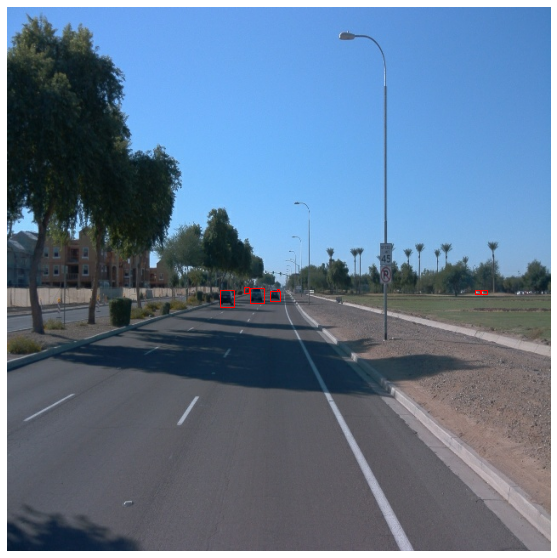

Name of TFrecord: b'segment-11355519273066561009_5323_000_5343_000_with_camera_labels_180.tfrecord'
Imageshape: (640, 640, 3)
Number of BBoxes: 16
Number of Objects: 16
Classes:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


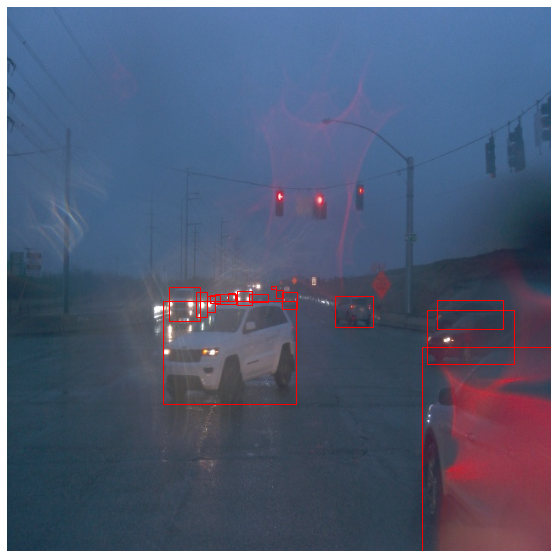

In [4]:
# Shuffle data with buffer_size 200 and take 10 elements
res = dataset.shuffle(200, reshuffle_each_iteration=True).take(10)
for element in res:
    display_instances(element)
    

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
def count_classes(tfrecord_file, max_iter):
    """
    max_iter defines the number of elements used of tfrecord_file 
    to calculate the class statistics
    Returnvalue is a normalized dict class_count = {1: x, 2: y, 4: z} containing
    the number of vehicles, pedestrians and cyclists found per image
    """
    class_count = {1: 0, 2: 0, 4: 0}
    for segment in dataset.take(max_iter):
        bbox_classes = segment['groundtruth_classes'].numpy()
        class_count[1] += (bbox_classes==1).sum()/max_iter
        class_count[2] += (bbox_classes==2).sum()/max_iter
        class_count[4] += (bbox_classes==4).sum()/max_iter
    return class_count

In [6]:
# Read in all .tfrecord files stored in training_and_validation folder and calculate the class distribution
records_list = glob.glob("data/waymo/training_and_validation/*.tfrecord")
class_comp = {}

# Iterate through tfrecords and calculate the class distribution for 
# 10000 elements in each tfrecord
for i,record in enumerate(records_list):
    dataset = get_dataset(record)
    class_comp[record] = count_classes(record, 10000)

# Write class distribution to file for later analysis
with open('Training_ClassComp.json', 'w') as f:
    print(json.dumps(class_comp), file=f)

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11343624116265195592_5910_530_5930_530_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-11343624116265195592_5910_530_5930_530_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11566385337103696871_5740_000_5760_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validat

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10455472356147194054_1560_000_1580_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10455472356147194054_1560_000_1580_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11004685739714500220_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11846396154240966170_3540_000_3560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-11846396154240966170_3540_000_3560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validatio

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validatio

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10107710434105775874_760_000_780_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10107710434105775874_760_000_780_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10235335145367115211_5420_000_5440_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/

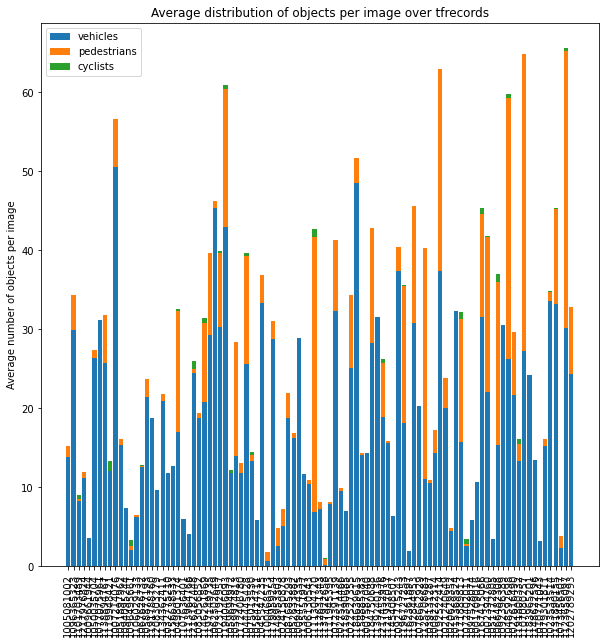

In [16]:
# Visualization of the class distribution of objects over all tfrecord files
with open('./Training_ClassComp.json') as f:
    predictions = json.load(f)

vehicles = []
pedestrians = []
cyclists = []
labels = []
for record in predictions:
    labels.append(record.split('segment-')[-1][:10])
    vehicles.append(predictions[record]["1"])
    pedestrians.append(predictions[record]["2"])
    cyclists.append(predictions[record]["4"])

vehicles = np.array(vehicles)
pedestrians = np.array(pedestrians)
cyclists = np.array(cyclists)

width = 0.8       # the width of the bars

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(labels, vehicles, width, label='vehicles',align='center')
ax.bar(labels, pedestrians, width, bottom=vehicles, label='pedestrians',align='center')
ax.bar(labels, cyclists, width,  bottom=vehicles+pedestrians, label='cyclists',align='center')

ax.set_ylabel('Average number of objects per image')
ax.set_title('Average distribution of objects per image over tfrecords')
plt.xticks(rotation='vertical')
ax.legend()

plt.show()

In [13]:
# Read in all .tfrecord files stored in test folder and calculate the class distribution
records_list = glob.glob("data/waymo/test/*.tfrecord")
class_comp = {}

# Iterate through tfrecords and calculate the class distribution for 
# 10000 elements in each tfrecord
for i,record in enumerate(records_list):
    dataset = get_dataset(record)
    class_comp[record] = count_classes(record, 10000)

# Write class distribution to file for later analysis
with open('Test_ClassComp.json', 'w') as f:
    print(json.dumps(class_comp), file=f)

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/test/segment-12012663867578114640_820_000_840_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/test/segment-12012663867578114640_820_000_840_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/test/segment-12200383401366682847_2552_140_2572_140_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/test/segment-12200383401366682847_2552_140_2572_140_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/test/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/test/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames t

In [ ]:
# Read in all .tfrecord files stored in training_and_validation folder and visualize one image per record
# Then manually create a JSON file by assigning each .tfrecord to a weather condition
records_list = glob.glob("data/waymo/training_and_validation/*.tfrecord")

# Iterate through tfrecords and visualize exactly one image per record
# to classify them according to the weather conditions
for i,record in enumerate(records_list):
    dataset = get_dataset(record)
    element = dataset.take(1)
    for elem in element:
        display_instances(elem)

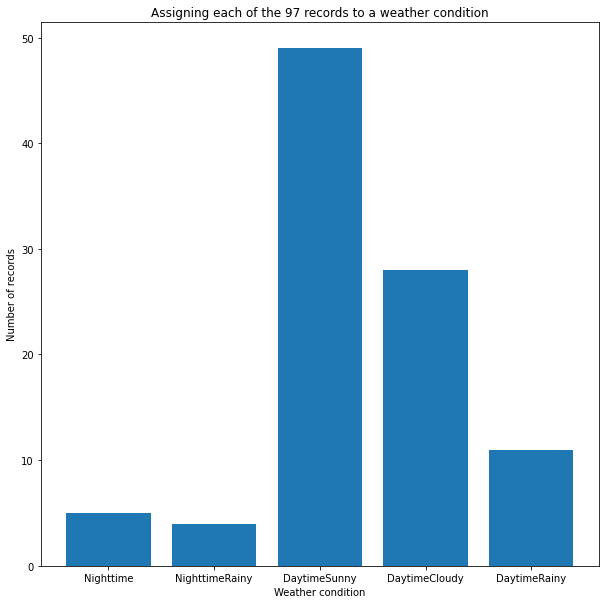

In [5]:
# Plot the assignment of tfrecord to weather condition
# Only works with a previously created 'Training_WeatherCondition.json'!
with open('Training_WeatherCondition.json') as f:
    weather_cond = json.load(f)

image_class = weather_cond['Classification']
labels = []
condition_count = []

for weather in image_class:
    labels.append(weather)
    condition_count.append(len(image_class[weather]))

fig, ax = plt.subplots(figsize=(10,10))
plt.bar(list(range(1,len(labels)+1)), height=condition_count)
plt.xticks(list(range(1,len(labels)+1)), labels)
plt.ylabel('Number of records')
plt.xlabel('Weather condition')
plt.title('Assigning each of the 97 records to a weather condition')

plt.show()